In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#Correlation

In [ ]:
startup.corr()

<ipython-input-5-7b5aa6741724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


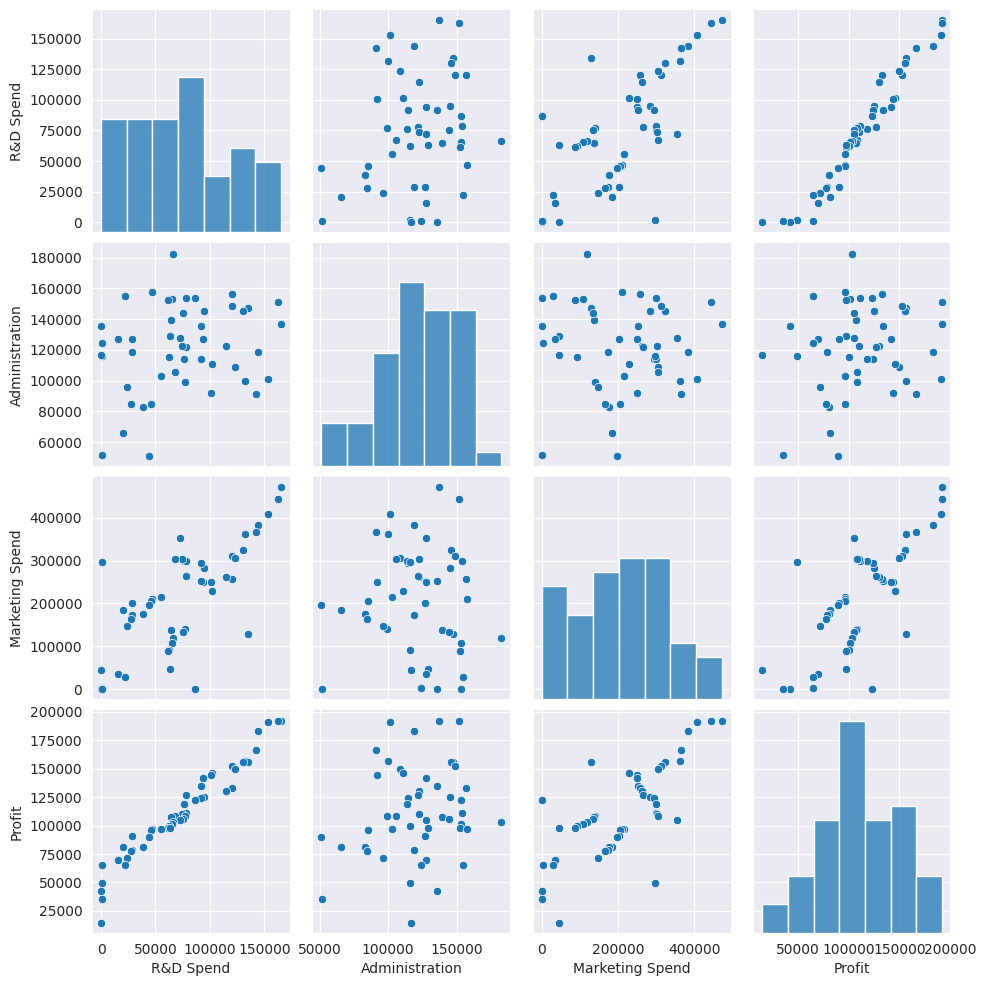

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

#Transformation Models

In [ ]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols("startup['Profit']~startup['R&D Spend']+startup['Administration']+startup['Marketing Spend']+startup['State']",data=startup).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      startup['Profit']   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.34e-27
Time:                        07:01:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
startup['State'][T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
startup['State'][T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
startup['R&D Spend']             0.8060      0.046     17.369      0.000       0.712       0.900
startup['Administration']       -0.0270      0.052     -0.517      0.608      -0.132       0.078
startup['Marketing Spend']       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept                       50125.343832
startup['State'][T.Florida]       198.788793
startup['State'][T.New York]      -41.887019
startup['R&D Spend']                0.806023
startup['Administration']          -0.027004
startup['Marketing Spend']          0.026980
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept                        7.280560
startup['State'][T.Florida]      0.058970
startup['State'][T.New York]    -0.012864
startup['R&D Spend']            17.368580
startup['Administration']       -0.517012
startup['Marketing Spend']       1.573889
dtype: float64 
 Intercept                       4.444178e-09
startup['State'][T.Florida]     9.532429e-01
startup['State'][T.New York]    9.897941e-01
startup['R&D Spend']            2.578772e-21
startup['Administration']       6.077373e-01
startup['Marketing Spend']      1.226769e-01
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
ml_v=smf.ols("startup['Profit']~startup['R&D Spend']",data = startup).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept               19.320288
startup['R&D Spend']    29.151139
dtype: float64 
 Intercept               2.782697e-24
startup['R&D Spend']    3.500322e-32
dtype: float64


In [ ]:
ml_v=smf.ols("startup['Profit']~startup['Administration']",data = startup).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept                    3.040044
startup['Administration']    1.419493
dtype: float64 
 Intercept                    0.003824
startup['Administration']    0.162217
dtype: float64


In [ ]:
ml_v=smf.ols("startup['Profit']~startup['Marketing Spend']",data = startup).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept                     7.808356
startup['Marketing Spend']    7.802657
dtype: float64 
 Intercept                     4.294735e-10
startup['Marketing Spend']    4.381073e-10
dtype: float64


In [ ]:
ml_v=smf.ols("startup['Profit']~startup['State']",data = startup).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept                       10.536302
startup['State'][T.Florida]      1.049860
startup['State'][T.New York]     0.706364
dtype: float64 
 Intercept                       5.774813e-14
startup['State'][T.Florida]     2.991510e-01
startup['State'][T.New York]    4.834492e-01
dtype: float64


In [ ]:
ml_v=smf.ols("startup['Profit']~startup['Marketing Spend']+startup['R&D Spend']",data = startup).fit()
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)
print(ml_v.summary())

Intercept                     17.463582
startup['Marketing Spend']     1.927052
startup['R&D Spend']          19.265555
dtype: float64 
 Intercept                     3.504062e-22
startup['Marketing Spend']    6.003040e-02
startup['R&D Spend']          6.040433e-24
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      startup['Profit']   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.16e-31
Time:                        09:15:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covarian

In [ ]:
rsq_ms = smf.ols("startup['Marketing Spend']~startup['Administration']+startup['State']",data=startup).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_rds = smf.ols("startup['R&D Spend']~startup['Marketing Spend']+startup['Administration']+startup['State']",data=startup).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_adm = smf.ols("startup['Administration']~startup['Marketing Spend']+startup['State']",data=startup).fit().rsquared
vif_adm = 1/(1-rsq_adm)

# Storing vif values in a data frame
d1 = {'Variables':['Marketing Spends','R&D Spend','Administration'],'VIF':[vif_ms,vif_rds,vif_adm]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Marketing Spends,1.052167
1,R&D Spend,2.495511
2,Administration,1.001557


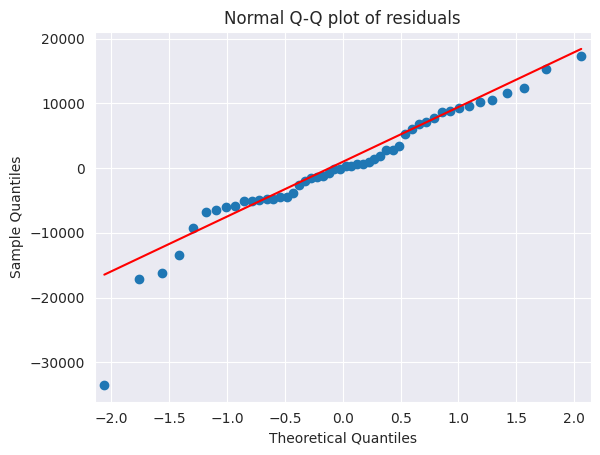

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

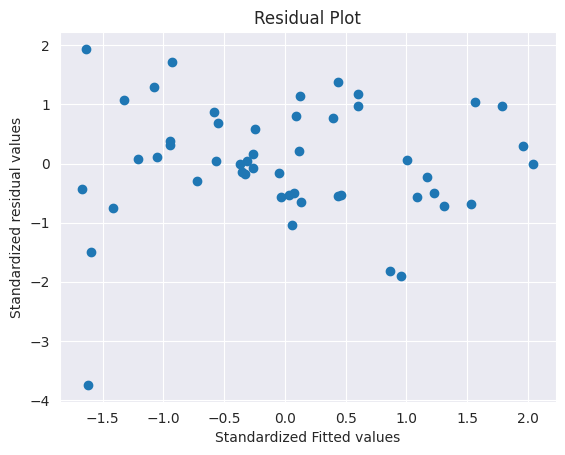

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

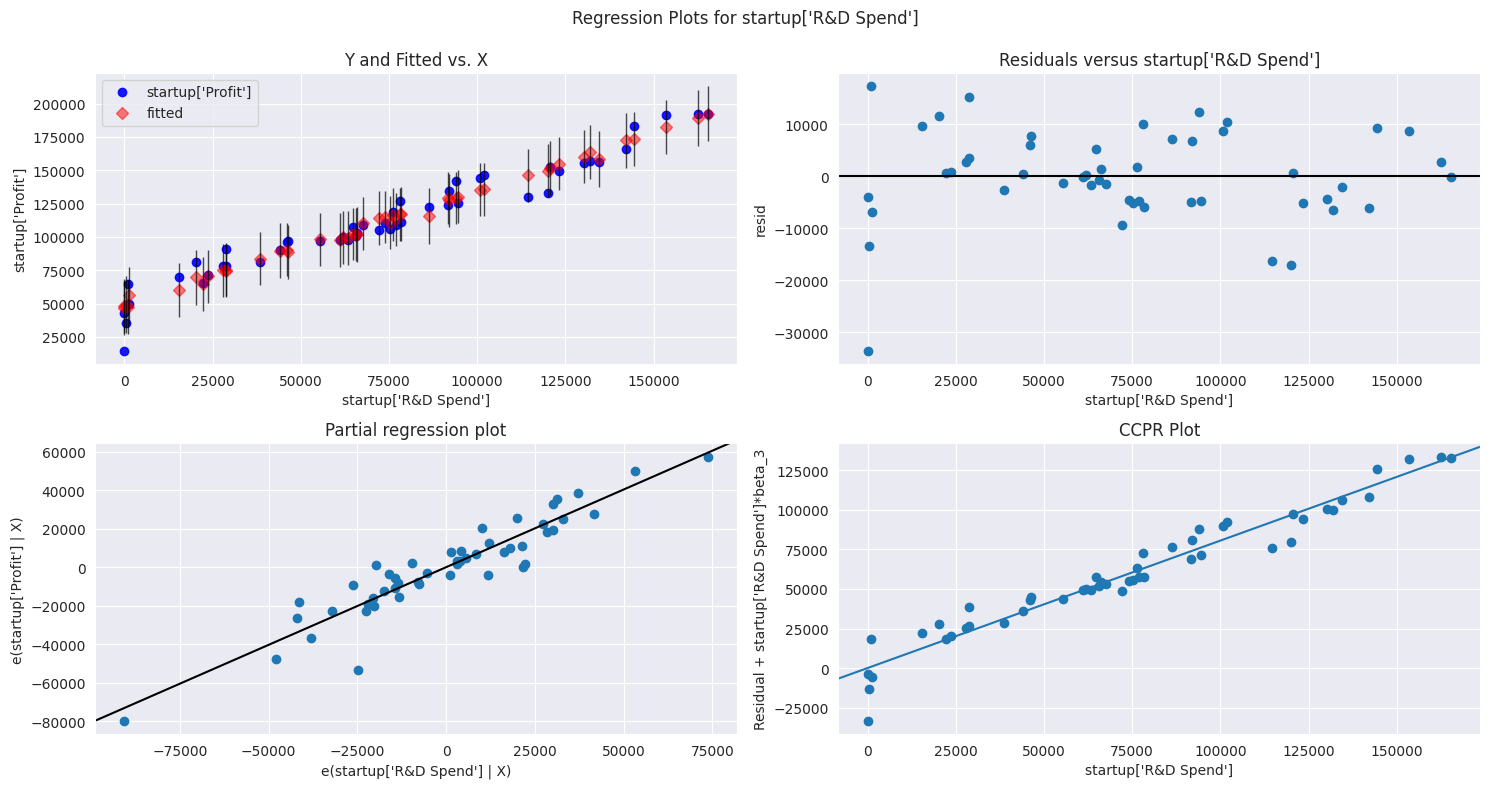

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "startup['R&D Spend']", fig=fig)
plt.show()

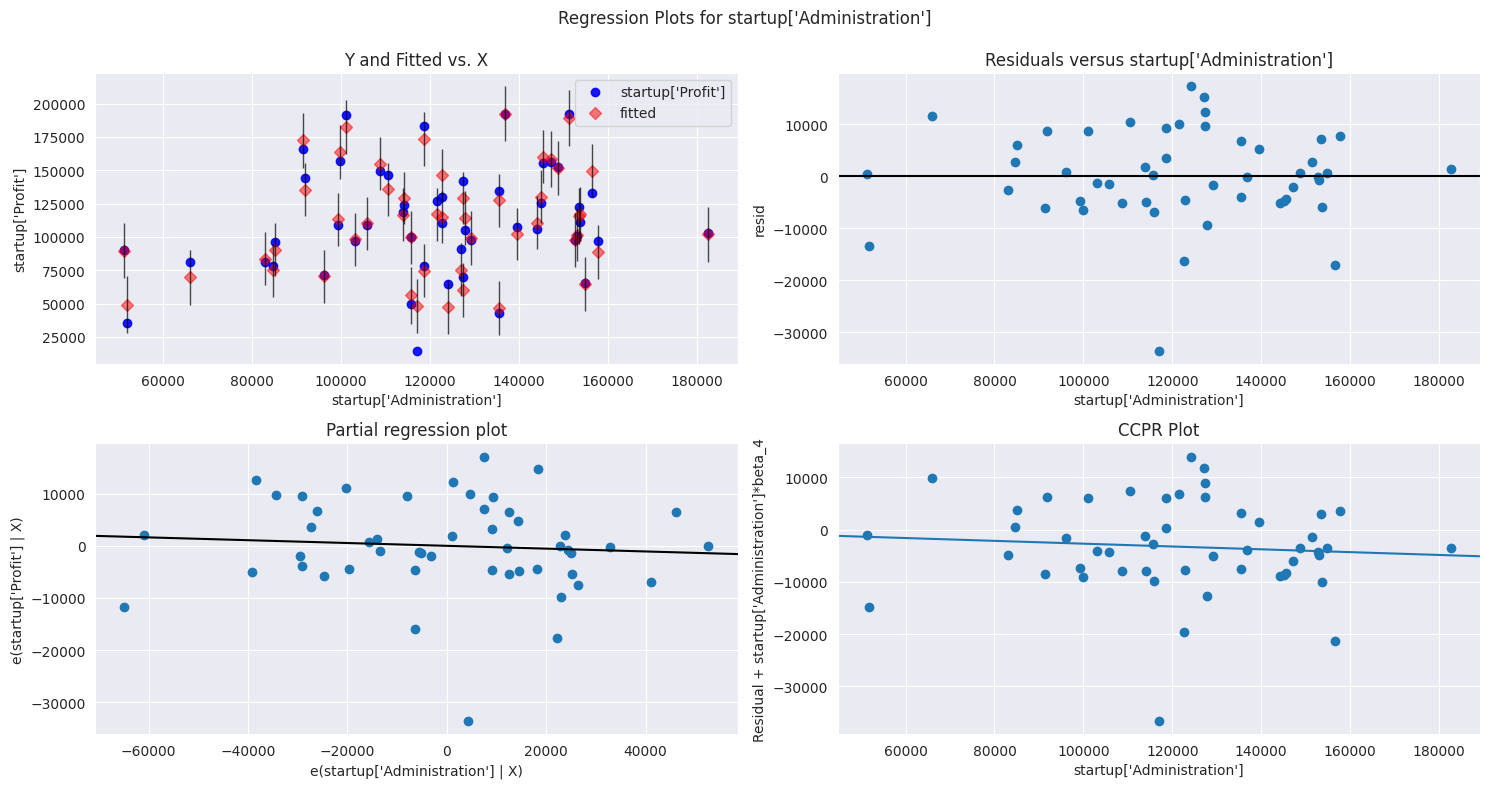

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "startup['Administration']", fig=fig)
plt.show()

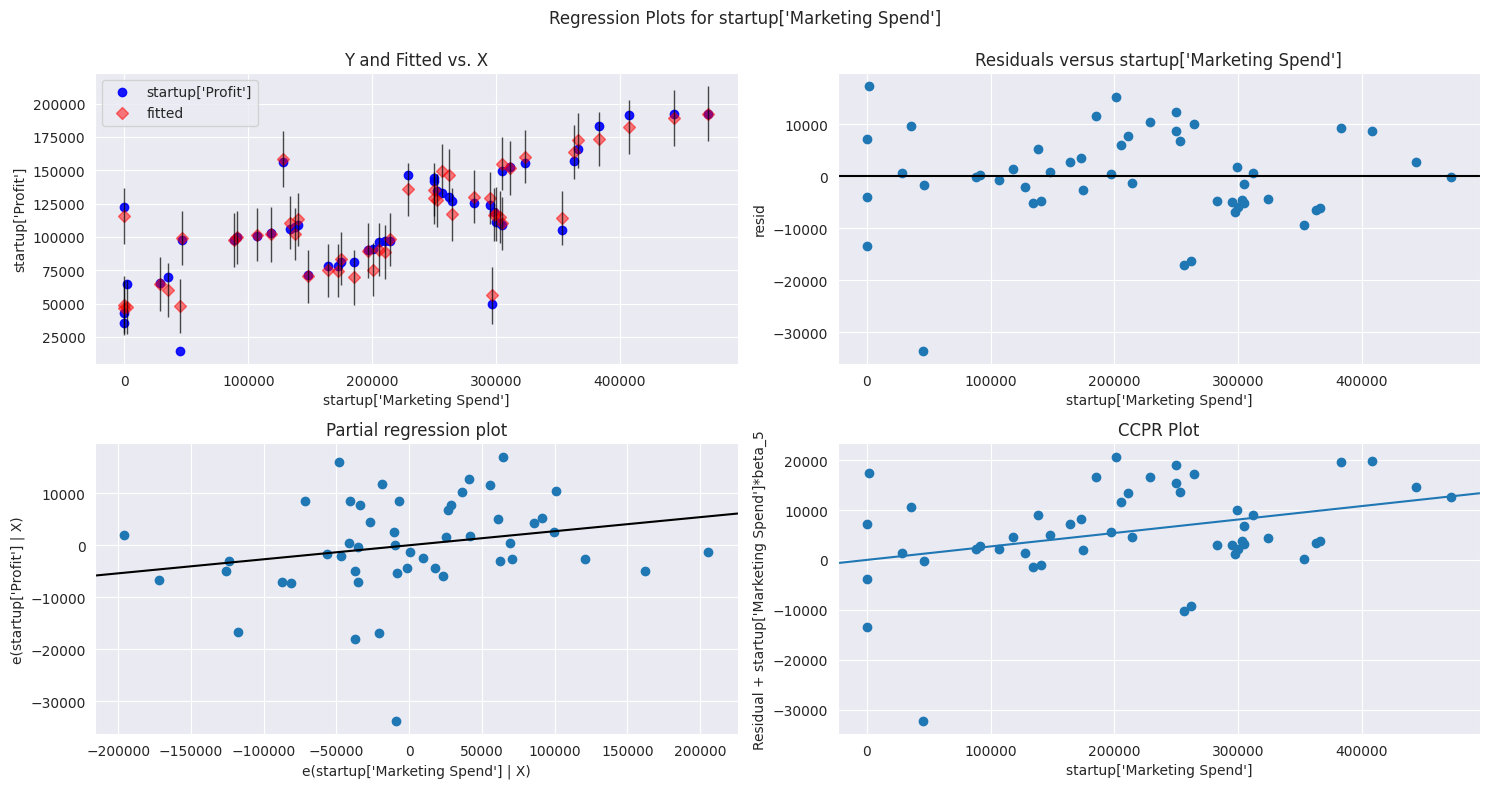

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "startup['Marketing Spend']", fig=fig)
plt.show()

#Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

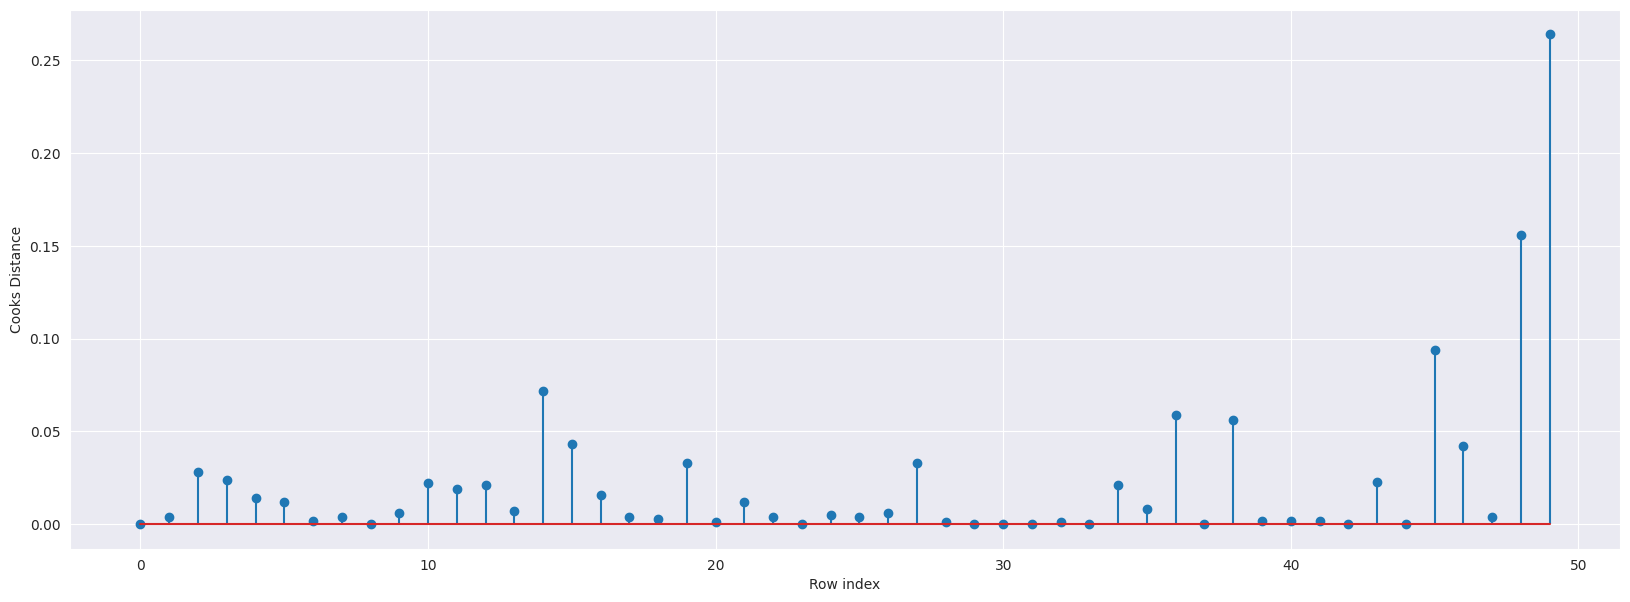

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2639594358675491)

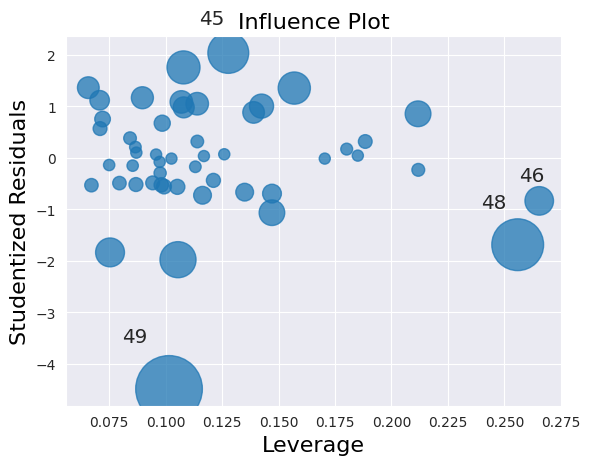

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols("startup['Profit']~startup['R&D Spend']+startup['Administration']+startup['Marketing Spend']+startup['State']",data = startup).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9507524843355148, 1062.764909597834)

#The R-Square value is  0.9507 which has high accuracy value